# Analize results

In [1]:
from supportFiles.myFunc import loadModel, getDSName, setTarget, loadDataset
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
getDSName(0)

'AB-TRAP_CIC'

### Get models and target DS. Only scan for now

In [2]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT'}
trainerDS = 0
testerDS = 3
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

loading models from SCAN_AB-TRAP_CIC
Models fetched: ['SCAN_AB-TRAP_CIC_DT.joblib', 'SCAN_AB-TRAP_CIC_LR.joblib', 'SCAN_AB-TRAP_CIC_MLP.joblib', 'SCAN_AB-TRAP_CIC_NB.joblib', 'SCAN_AB-TRAP_CIC_SVM.joblib', 'SCAN_AB-TRAP_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2021-12-22 16:27:14
setTarget: Removed 2800319 flows from other attack types



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


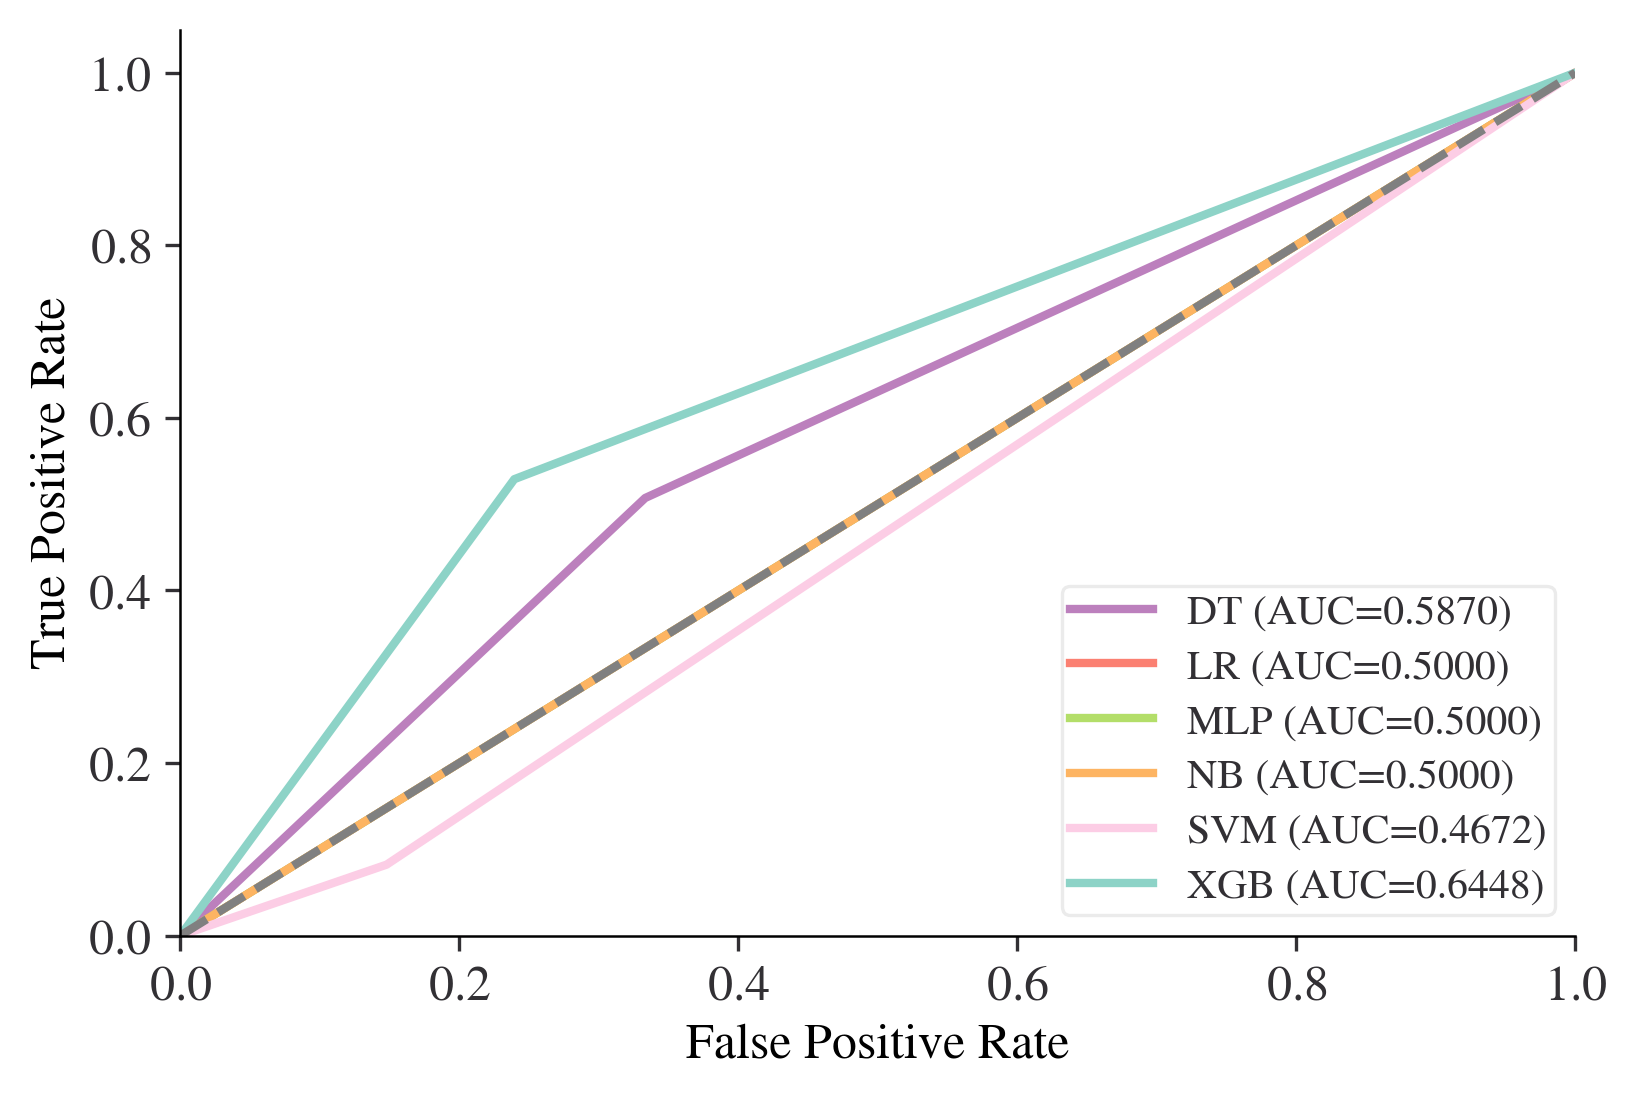

In [3]:
import os
from sklearn.metrics import roc_curve, auc
plt.style.use('supportFiles/plot_style.txt')

plt.figure()

index = 0
for model_key, model in models.items():
    fpr, tpr, thresholds = roc_curve( y, model.predict(prep.transform(X)) )
    AUC = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label="{} (AUC={:.4f})".format(model_key, AUC))
    index = index + 1
    # save ROC data
filename = 'dissertation/{0}_on_{1}_ROC.eps'.format(trainerDSName, testerDSName)
    #pd.DataFrame.from_dict(data={ 'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds }).to_csv(filename, index=False)
    
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.savefig(filename, dpi=300, bbox_inches="tight")

# Feature Importance

In [1]:
from supportFiles.myFunc import loadModel, getDSName, setTarget, loadDataset, getFeatureList
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
getDSName(0)

'AB-TRAP_CIC'

In [2]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT'}
trainerDS = 0
testerDS = 1
modelName = "DT"
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
cols = getFeatureList(0)[0:67]
#X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

loading models from SCAN_AB-TRAP_CIC
Models fetched: ['SCAN_AB-TRAP_CIC_DT.joblib', 'SCAN_AB-TRAP_CIC_LR.joblib', 'SCAN_AB-TRAP_CIC_MLP.joblib', 'SCAN_AB-TRAP_CIC_NB.joblib', 'SCAN_AB-TRAP_CIC_SVM.joblib', 'SCAN_AB-TRAP_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT


### DT

In [3]:
clf = models['DT'].best_estimator_
relevantes = clf.feature_importances_
#for index in range(len(cols)):#.iterrows():
#    print(relevantes[index], cols[index])

reading file: 


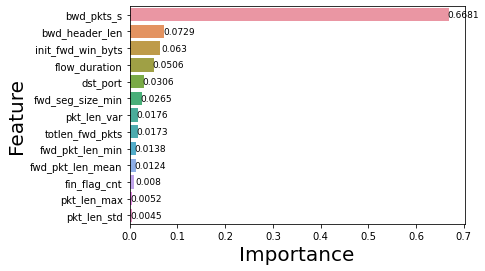

In [4]:
import seaborn as sns
import os

fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.004]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    g.text(row.feature_importance+0.03, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, modelName)
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### check models parameters

In [17]:
%pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2

### LR

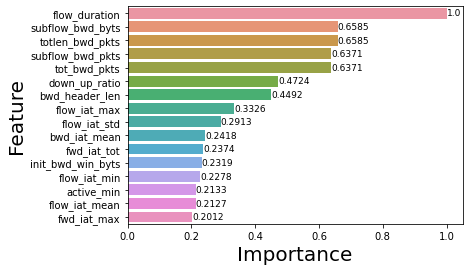

In [44]:
#print("DT", models["DT"].best_estimator_.__dict__)
relevantes = list(map(abs, models["LR"].best_estimator_.coef_))[0]
relevantes = relevantes/max(relevantes)
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.2]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "LR")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### MLP

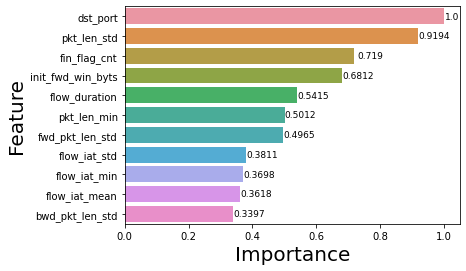

In [83]:
models["MLP"].best_estimator_.coefs_[1]
hocuspocus = lambda a,b: [[r*q for r,q in zip(p,b)] for p in a]
c = hocuspocus(models["MLP"].best_estimator_.coefs_[0],models["MLP"].best_estimator_.coefs_[1])
relevantes = []
for entry in c:
    relevantes.append(sum(list(map(abs, entry))[0]) )
    
relevantes = relevantes/max(relevantes)
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.3]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "MLP")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### SVM

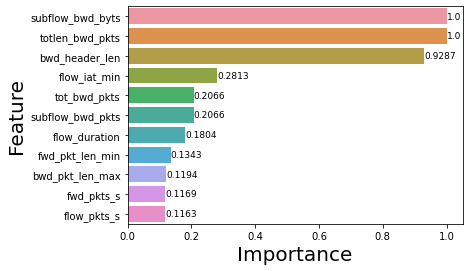

In [95]:
relevantes = list(map(abs, models["SVM"].best_estimator_.coef_[0]))
relevantes = relevantes/max(relevantes)
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.1]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "SVM")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### SVM by prediction

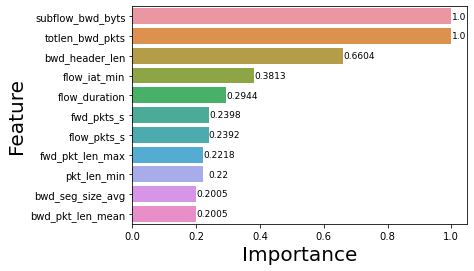

In [106]:
relevantes = list(map(abs, models["SVM"].best_estimator_.decision_function(np.identity(67))))
relevantes = relevantes/max(relevantes)
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.2]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "SVM")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

### XGB

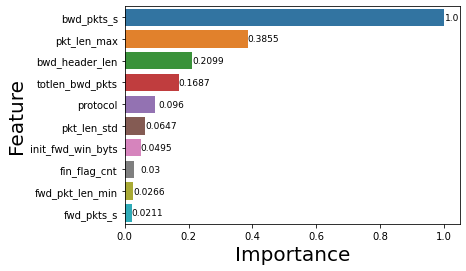

In [115]:
relevantes = list(map(abs, models["XGB"].best_estimator_.feature_importances_))
relevantes = relevantes/max(relevantes)
fi_df = pd.DataFrame({'feature_importance': relevantes, 'feature_name': cols})

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0.02]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    if row.feature_importance==1:
        temp=0.025
    else:
        temp=0.05
    g.text(row.feature_importance+temp, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, "SVM")
plt.savefig(filename, dpi=300, bbox_inches = "tight")

In [ ]:
from sklearn.inspection import permutation_importance
X, y = setTarget(loadDataset(trainerDS, 96, 1), trainerDS, True, True, trainerDS)
imps = permutation_importance(models["NB"].best_estimator_, X, y)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

Loading data set from existing file: AB-TRAP_CIC.csv
reading file: 


In [12]:
print(models.keys())
#for key, model in models.items():
#    print(key)
#    print(model.best_estimator_.__dict__)
print("DT", models["DT"].best_estimator_.tree_)
print("LR", models["LR"].best_estimator_.coef_)
print("MLP", models["MLP"].best_estimator_.coefs_)
print("NB", models["NB"].best_estimator_)
print("SVM", models["SVM"].best_estimator_.coef_)
print("XGB", models["XGB"].best_estimator_)

dict_keys(['DT', 'LR', 'MLP', 'NB', 'SVM', 'XGB'])
DT <sklearn.tree._tree.Tree object at 0x000001CCB0AC2650>
LR [[-0.52737794 -0.58778464 -6.41651692 -0.79279088 -1.00945958 -1.03326465
   0.91320776 -0.43035491 -4.08795704 -0.54756425 -4.22551145 -0.0626082
   0.38390283 -0.5583535  -0.03272465  0.60909284  0.63309802  0.64004824
  -0.08483786  0.0803063  -1.16440144  0.29065739  0.55738651 -0.1298866
  -0.91107797 -2.88214739  0.58778418 -0.49257806 -1.3647719  -2.13437729
  -1.46170362 -1.86940719 -1.52310503 -1.29120183  0.57320528  1.1097985
  -0.71217169 -0.95204262 -0.7727257  -0.11378504  1.55161047  0.25684344
   1.08982073 -3.03136432  0.29065739 -1.12613411 -1.48799782  0.30155348
  -1.36836559  0.7190983   1.24225398 -1.22393905 -0.77996132  0.46841967
  -0.20331916  0.0524336   0.0524336  -0.01524365 -0.01524365 -0.03083704
  -0.00949808 -0.5583535   0.64004824 -0.43035491 -4.08795704 -0.54756425
  -4.22551145]]
MLP [array([[-1.38092664e+00, -1.08324403e-01, -3.49575517e+0

In [1]:
import pandas as pd
import numpy as np
import os
from supportFiles.myFunc import saveTable

files = [s for s in os.listdir("./dissertation/") if ((".csv" in s) and ("fscore_" in s))]
print(files)
for file in files:
    tableName = file.replace(".csv","")
    table = pd.read_csv("./dissertation/"+file, sep=',')
    caption = "Feature importance {0}".format(tableName)
    label = tableName
    saveTable(table, tableName, caption, label)

['fscore_AB-TRAP_CIC.csv', 'fscore_BoT-IoT_CIC.csv', 'fscore_NB15_CIC.csv', 'fscore_SCAN_AB-TRAP_CIC.csv', 'fscore_SCAN_BoT-IoT_CIC.csv', 'fscore_SCAN_CIC-IDS_CIC.csv', 'fscore_SCAN_NB15_CIC.csv', 'fscore_SCAN_ToN-IoT_CIC.csv', 'fscore_ToN-IoT_CIC.csv']
